# Лабораторная работа 1. Нечеткие множества и операции над ними. Вариант 12

## Разбор примера

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = {'a1': 0.1, 'a2': 0.6, 'a3': 0.9, 'a4': 1, 'a5': 0.5, 'a6': 0.8, 'a7': 0.4, 'a8': 0.5},\
          {'a1': 0.7, 'a2': 0.5, 'a3': 1, 'a4': 0.6, 'a5': 0.4, 'a6': 0.3, 'a7': 0, 'a8': 0.2}

data_frame1 = pd.DataFrame(columns, index=['mu1x', 'mu2y'])

data_frame1.loc['Не X'] = 1 - data_frame1.loc['mu1x']
data_frame1.loc['Не Y'] = 1 - data_frame1.loc['mu2y']
data_frame1.loc['Пересечение X и Y'] = data_frame1.loc[['mu1x', 'mu2y']].min()
data_frame1.loc['Объединение X и Y'] = data_frame1.loc[['mu1x', 'mu2y']].max()
data_frame1.loc['Пересечение X и не Y'] = data_frame1.loc[['mu1x', 'Не Y']].min()
data_frame1.loc['Ограниченная сумма'] = data_frame1.loc[['Пересечение X и не Y', 'Не X']].max()


data_frame2 = pd.DataFrame(columns={'Расстояния и индексы нечеткости'}, index=['Абсолютное расстояние по Хеммингу между X и Y'])

data_frame2.loc['Абсолютное расстояние по Хеммингу между X и Y'] = (data_frame1.loc['mu1x'] - data_frame1.loc['mu2y']).abs().sum()
data_frame2.loc['Абсолютное расстояние по Евклиду между X и Y'] = (((data_frame1.loc['mu1x'] - data_frame1.loc['mu2y']).abs()) ** 2).sum() ** 0.5
data_frame2.loc['Относительное расстояние по Хемминга между X и Y'] = data_frame2.loc['Абсолютное расстояние по Хеммингу между X и Y'] / len(data_frame1.count())
data_frame2.loc['Относительное расстояние по Евклиду между X и Y'] = (data_frame2.loc['Абсолютное расстояние по Евклиду между X и Y'] / len(data_frame1.count())) ** 0.5
data_frame2.loc['Обычное подмножество ближайшее к X'] = (data_frame1.loc['mu1x'] - data_frame1.loc['mu1x'].round()).abs().sum()
data_frame2.loc['Обычное подмножество ближайшее к Y'] = (data_frame1.loc['mu2y'] - data_frame1.loc['mu2y'].round()).abs().sum()
data_frame2.loc['Индекс нечеткости X по Хеммингу'] = (data_frame2.loc['Обычное подмножество ближайшее к X'] / len(data_frame1.count())) * 2
data_frame2.loc['Индекс нечеткости Y по Хеммингу'] = (data_frame2.loc['Обычное подмножество ближайшее к Y'] / len(data_frame1.count())) * 2
data_frame2.loc['Индекс нечеткости X по Евклиду'] = (data_frame2.loc['Обычное подмножество ближайшее к X'] ** 0.5 / len(data_frame1.count()) ** 0.5) * 2
data_frame2.loc['Индекс нечеткости Y по Евклиду'] = (data_frame2.loc['Обычное подмножество ближайшее к Y'] ** 0.5 / len(data_frame1.count()) ** 0.5) * 2

In [117]:
data_frame1

,a1,a2,a3,a4,a5,a6,a7,a8
mu1x,0.1,0.6,0.9,1.0,0.5,0.8,0.4,0.5
mu2y,0.7,0.5,1.0,0.6,0.4,0.3,0.0,0.2
Не X,0.9,0.4,0.1,0.0,0.5,0.2,0.6,0.5
Не Y,0.3,0.5,0.0,0.4,0.6,0.7,1.0,0.8
Пересечение X и Y,0.1,0.5,0.9,0.6,0.4,0.3,0.0,0.2
Объединение X и Y,0.7,0.6,1.0,1.0,0.5,0.8,0.4,0.5
Пересечение X и не Y,0.1,0.5,0.0,0.4,0.5,0.7,0.4,0.5
Ограниченная сумма,0.9,0.5,0.1,0.4,0.5,0.7,0.6,0.5


In [109]:
data_frame2

,Расстояния и индексы нечеткости
Абсолютное расстояние по Хеммингу между X и Y,2.5
Абсолютное расстояние по Евклиду между X и Y,1.024695
Относительное расстояние по Хемминга между X и Y,0.3125
Относительное расстояние по Евклиду между X и Y,0.357892
Обычное подмножество ближайшее к X,2.2
Обычное подмножество ближайшее к Y,2.1
Индекс нечеткости X по Хеммингу,0.55
Индекс нечеткости Y по Хеммингу,0.525
Индекс нечеткости X по Евклиду,1.048809
Индекс нечеткости Y по Евклиду,1.024695


## Графики

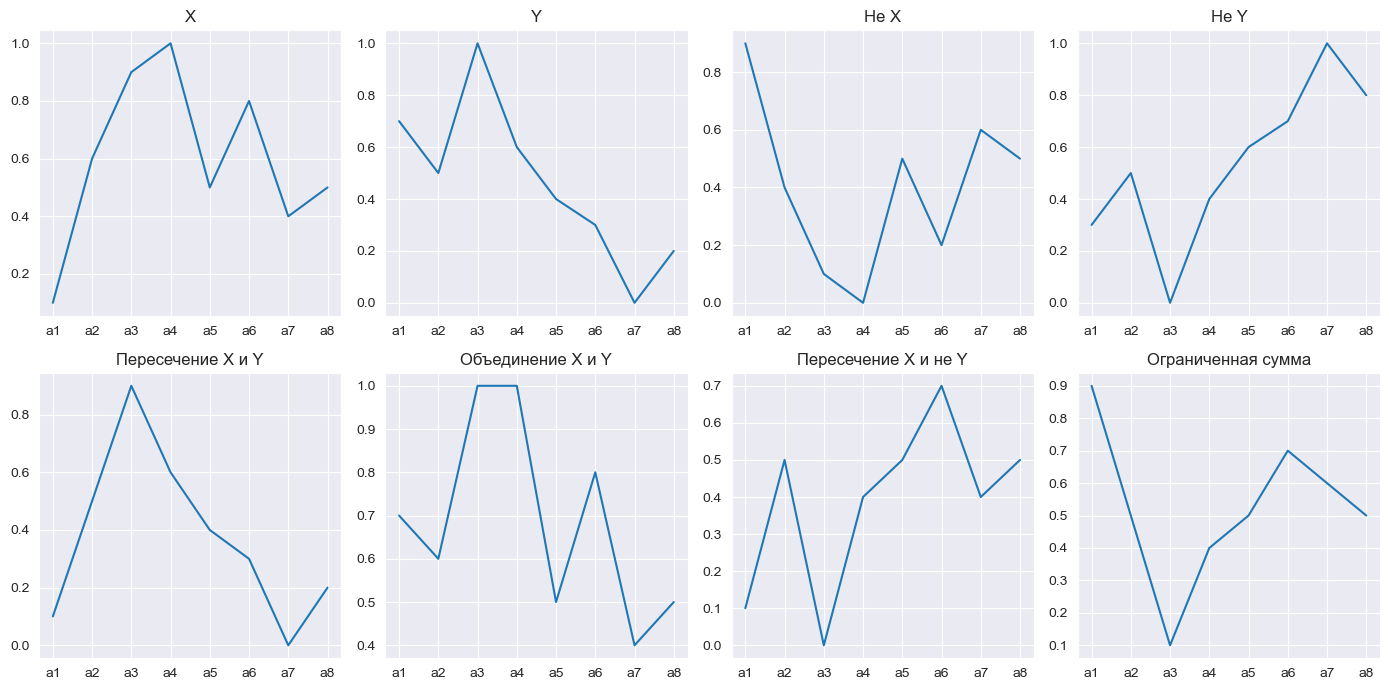

In [110]:
fig1, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7))

sns.lineplot(data=data_frame1.loc['mu1x'], ax=ax[0, 0]).set(title='X', ylabel=None)
sns.lineplot(data=data_frame1.loc['mu2y'], ax=ax[0, 1]).set(title='Y', ylabel=None)
sns.lineplot(data=data_frame1.loc['Не X'], ax=ax[0, 2]).set(title='Не X', ylabel=None)
sns.lineplot(data=data_frame1.loc['Не Y'], ax=ax[0, 3]).set(title='Не Y', ylabel=None)
sns.lineplot(data=data_frame1.loc['Пересечение X и Y'], ax=ax[1, 0]).set(title='Пересечение X и Y', ylabel=None)
sns.lineplot(data=data_frame1.loc['Объединение X и Y'], ax=ax[1, 1]).set(title='Объединение X и Y', ylabel=None)
sns.lineplot(data=data_frame1.loc['Пересечение X и не Y'], ax=ax[1, 2]).set(title='Пересечение X и не Y', ylabel=None)
sns.lineplot(data=data_frame1.loc['Ограниченная сумма'], ax=ax[1, 3]).set(title='Ограниченная сумма', ylabel=None)

plt.tight_layout()
plt.show()

## Решение задачи. Вариант 12

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns = {'a1': 0.6, 'a2': 0.4, 'a3': 0.8, 'a4': 0.5, 'a5': 0.9, 'a6': 0.3, 'a7': 0, 'a8': 0.2},\
          {'a1': 0.8, 'a2': 0.6, 'a3': 0.9, 'a4': 1, 'a5': 1, 'a6': 0.3, 'a7': 0, 'a8': 0}


data_frame3 = pd.DataFrame(columns, index=['mu1x', 'mu2y'])

data_frame3.loc['Не X'] = 1 - data_frame3.loc['mu1x']
data_frame3.loc['Не Y'] = 1 - data_frame3.loc['mu2y']
data_frame3.loc['Пересечение X и Y'] = data_frame3.loc[['mu1x', 'mu2y']].min()
data_frame3.loc['Объединение X и Y'] = data_frame3.loc[['mu1x', 'mu2y']].max()
data_frame3.loc['Пересечение X и не Y'] = data_frame3.loc[['mu1x', 'Не Y']].min()
data_frame3.loc['Ограниченная сумма'] = data_frame3.loc[['Пересечение X и не Y', 'Не X']].max()


data_frame4 = pd.DataFrame(columns={'Расстояния и индексы нечеткости'}, index=['Абсолютное расстояние по Хеммингу между X и Y'])

data_frame4.loc['Абсолютное расстояние по Хеммингу между X и Y'] = (data_frame3.loc['mu1x'] - data_frame3.loc['mu2y']).abs().sum()
data_frame4.loc['Абсолютное расстояние по Евклиду между X и Y'] = (((data_frame3.loc['mu1x'] - data_frame3.loc['mu2y']).abs()) ** 2).sum() ** 0.5
data_frame4.loc['Относительное расстояние по Хемминга между X и Y'] = data_frame4.loc['Абсолютное расстояние по Хеммингу между X и Y'] / len(data_frame3.count())
data_frame4.loc['Относительное расстояние по Евклиду между X и Y'] = (data_frame4.loc['Абсолютное расстояние по Евклиду между X и Y'] / len(data_frame3.count())) ** 0.5
data_frame4.loc['Обычное подмножество ближайшее к X'] = (data_frame3.loc['mu1x'] - data_frame3.loc['mu1x'].round()).abs().sum()
data_frame4.loc['Обычное подмножество ближайшее к Y'] = (data_frame3.loc['mu2y'] - data_frame3.loc['mu2y'].round()).abs().sum()
data_frame4.loc['Индекс нечеткости X по Хеммингу'] = (data_frame4.loc['Обычное подмножество ближайшее к X'] / len(data_frame3.count())) * 2
data_frame4.loc['Индекс нечеткости Y по Хеммингу'] = (data_frame4.loc['Обычное подмножество ближайшее к Y'] / len(data_frame3.count())) * 2
data_frame4.loc['Индекс нечеткости X по Евклиду'] = (data_frame4.loc['Обычное подмножество ближайшее к X'] ** 0.5 / len(data_frame3.count()) ** 0.5) * 2
data_frame4.loc['Индекс нечеткости Y по Евклиду'] = (data_frame4.loc['Обычное подмножество ближайшее к Y'] ** 0.5 / len(data_frame3.count()) ** 0.5) * 2

In [112]:
data_frame3

,a1,a2,a3,a4,a5,a6,a7,a8
mu1x,0.6,0.4,0.8,0.5,0.9,0.3,0.0,0.2
mu2y,0.8,0.6,0.9,1.0,1.0,0.3,0.0,0.0
Не X,0.4,0.6,0.2,0.5,0.1,0.7,1.0,0.8
Не Y,0.2,0.4,0.1,0.0,0.0,0.7,1.0,1.0
Пересечение X и Y,0.6,0.4,0.8,0.5,0.9,0.3,0.0,0.0
Объединение X и Y,0.8,0.6,0.9,1.0,1.0,0.3,0.0,0.2
Пересечение X и не Y,0.2,0.4,0.1,0.0,0.0,0.3,0.0,0.2
Ограниченная сумма,0.4,0.6,0.2,0.5,0.1,0.7,1.0,0.8


In [113]:
data_frame4

,Расстояния и индексы нечеткости
Абсолютное расстояние по Хеммингу между X и Y,1.3
Абсолютное расстояние по Евклиду между X и Y,0.6245
Относительное расстояние по Хемминга между X и Y,0.1625
Относительное расстояние по Евклиду между X и Y,0.279397
Обычное подмножество ближайшее к X,2.1
Обычное подмножество ближайшее к Y,1.0
Индекс нечеткости X по Хеммингу,0.525
Индекс нечеткости Y по Хеммингу,0.25
Индекс нечеткости X по Евклиду,1.024695
Индекс нечеткости Y по Евклиду,0.707107


## Графики

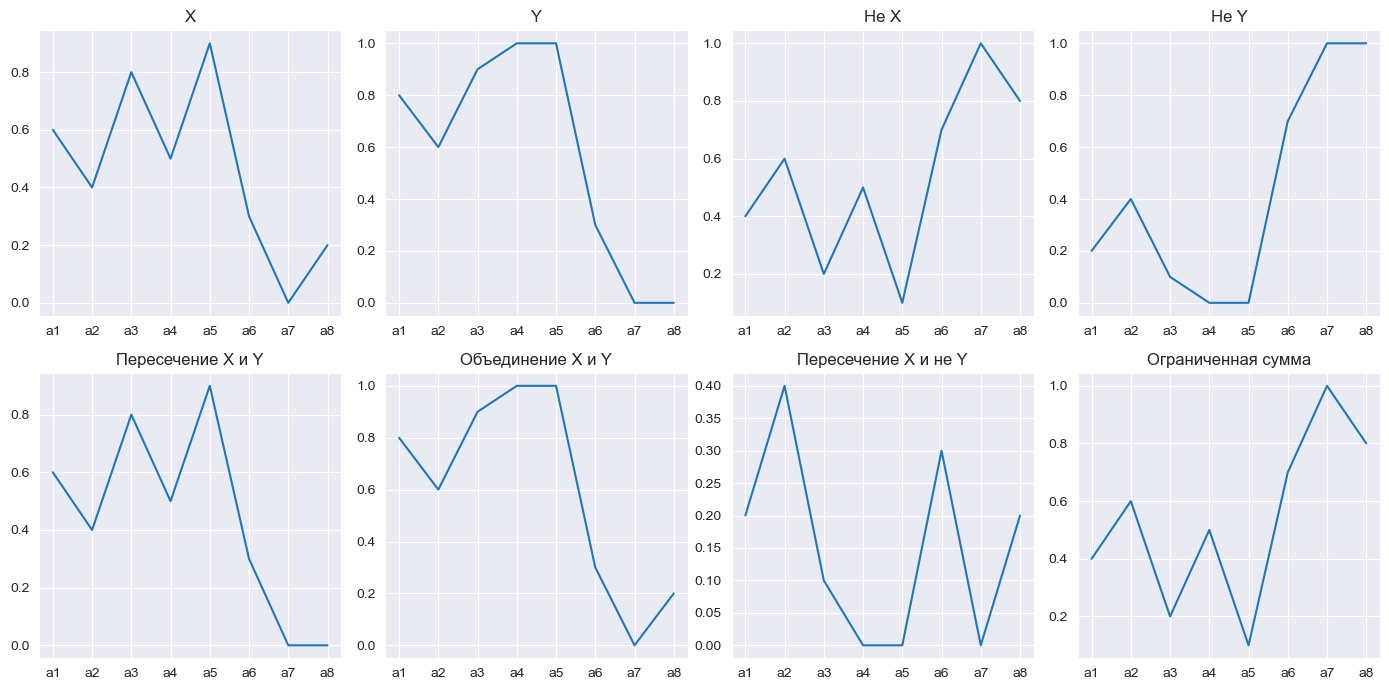

In [114]:
fig2, ax = plt.subplots(nrows=2, ncols=4, figsize=(14, 7))

sns.lineplot(data=data_frame3.loc['mu1x'], ax=ax[0, 0]).set(title='X', ylabel=None)
sns.lineplot(data=data_frame3.loc['mu2y'], ax=ax[0, 1]).set(title='Y', ylabel=None)
sns.lineplot(data=data_frame3.loc['Не X'], ax=ax[0, 2]).set(title='Не X', ylabel=None)
sns.lineplot(data=data_frame3.loc['Не Y'], ax=ax[0, 3]).set(title='Не Y', ylabel=None)
sns.lineplot(data=data_frame3.loc['Пересечение X и Y'], ax=ax[1, 0]).set(title='Пересечение X и Y', ylabel=None)
sns.lineplot(data=data_frame3.loc['Объединение X и Y'], ax=ax[1, 1]).set(title='Объединение X и Y', ylabel=None)
sns.lineplot(data=data_frame3.loc['Пересечение X и не Y'], ax=ax[1, 2]).set(title='Пересечение X и не Y', ylabel=None)
sns.lineplot(data=data_frame3.loc['Ограниченная сумма'], ax=ax[1, 3]).set(title='Ограниченная сумма', ylabel=None)

plt.tight_layout()
plt.show()